In [69]:
import pandas as pd
import numpy as np
import os 
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ruta = '/home/jose/data/chicago/'

In [3]:
lst_arch = [x for x in os.listdir(ruta) if x[:3]=='chi']

In [4]:
%%time
lst_df = []
for i,arch in enumerate(lst_arch):
    print (arch)
    df = pd.read_csv(os.path.join(ruta,arch))
    #df = df.merge(aux2,on='taxi_id',how='inner')
    lst_df.append(df)
df = pd.concat(lst_df,ignore_index=True)

chicago_taxi_trips_2016_01.csv
chicago_taxi_trips_2016_02.csv
chicago_taxi_trips_2016_03.csv
chicago_taxi_trips_2016_04.csv
chicago_taxi_trips_2016_05.csv
chicago_taxi_trips_2016_06.csv
chicago_taxi_trips_2016_07.csv
chicago_taxi_trips_2016_08.csv
chicago_taxi_trips_2016_09.csv
chicago_taxi_trips_2016_10.csv
chicago_taxi_trips_2016_11.csv
chicago_taxi_trips_2016_12.csv
CPU times: user 1min 2s, sys: 4.7 s, total: 1min 7s
Wall time: 4min 13s


In [5]:
df.shape

(19866157, 20)

In [6]:
df = df[['taxi_id','trip_start_timestamp','trip_seconds','trip_miles','trip_total']]

In [7]:
df.trip_start_timestamp = pd.to_datetime(df.trip_start_timestamp).dt.date 

In [11]:
%%time
df['week'] = df.trip_start_timestamp.map(lambda x:x.strftime('%U'))
df['day'] = df.trip_start_timestamp.map(lambda x:x.weekday())

CPU times: user 56.4 s, sys: 386 ms, total: 56.8 s
Wall time: 56.8 s


In [12]:
df.head()

,taxi_id,trip_start_timestamp,trip_seconds,trip_miles,trip_total,day,week
0,85.0,2016-01-13,180.0,0.40,4.50,2,02
1,2776.0,2016-01-22,240.0,0.70,8.90,4,03
2,3168.0,2016-01-31,0.0,0.00,47.75,6,05
3,4237.0,2016-01-23,480.0,1.10,7.00,5,03
4,5710.0,2016-01-14,480.0,2.71,10.25,3,02


In [13]:
aux = df.loc[df.week=='05'].copy()

In [14]:
sorted(aux.trip_start_timestamp.unique())

[datetime.date(2016, 1, 31),
 datetime.date(2016, 2, 1),
 datetime.date(2016, 2, 2),
 datetime.date(2016, 2, 3),
 datetime.date(2016, 2, 4),
 datetime.date(2016, 2, 5),
 datetime.date(2016, 2, 6)]

In [15]:
aux.head(10)

,taxi_id,trip_start_timestamp,trip_seconds,trip_miles,trip_total,day,week
2,3168.0,2016-01-31,0.0,0.0,47.75,6,05
119,2197.0,2016-01-31,240.0,0.8,7.00,6,05
148,336.0,2016-01-31,480.0,1.1,8.00,6,05
259,1408.0,2016-01-31,0.0,0.0,18.30,6,05
274,6706.0,2016-01-31,240.0,0.9,6.75,6,05
432,1401.0,2016-01-31,660.0,1.5,11.50,6,05
624,3232.0,2016-01-31,360.0,0.0,8.75,6,05
715,8054.0,2016-01-31,60.0,0.2,3.75,6,05
746,7625.0,2016-01-31,600.0,5.3,16.00,6,05
761,5672.0,2016-01-31,120.0,0.4,4.25,6,05


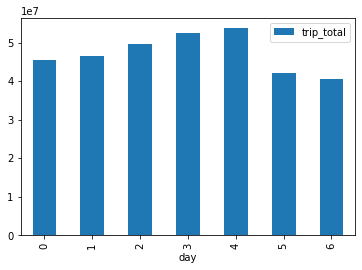

In [16]:
df[['day','trip_total']].groupby('day').sum().plot(kind='bar')

In [17]:
df['weekend'] = df['day'].isin([5,6]).astype(int)

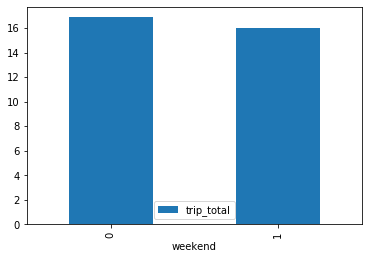

In [18]:
df[['weekend','trip_total']].groupby('weekend').mean().plot(kind='bar')

In [19]:
df.head()

,taxi_id,trip_start_timestamp,trip_seconds,trip_miles,trip_total,day,week,weekend
0,85.0,2016-01-13,180.0,0.40,4.50,2,02,0
1,2776.0,2016-01-22,240.0,0.70,8.90,4,03,0
2,3168.0,2016-01-31,0.0,0.00,47.75,6,05,1
3,4237.0,2016-01-23,480.0,1.10,7.00,5,03,1
4,5710.0,2016-01-14,480.0,2.71,10.25,3,02,0


In [20]:
lst = []

In [21]:
var = ['trip_seconds','trip_miles','trip_total']

In [22]:
lst.append(df[['week','trip_seconds','trip_miles','trip_total']].groupby('week').mean().rename(columns=dict(zip(var,['v_media_%s'%x for x in var]))))
lst.append(df[['week','trip_seconds','trip_miles','trip_total']].groupby('week').sum()[['trip_total']].rename(columns={'trip_total':'v_trip_total'}))
lst.append(df[['week','taxi_id']].groupby('week').count().rename(columns={'taxi_id':'v_num_viajes'}))
aux = df[['taxi_id','week']].drop_duplicates()
lst.append(aux.groupby('week').count().copy().rename(columns={'taxi_id':'v_num_taxis_activos'}))

In [23]:
df_we = df.loc[df.weekend==1].copy()
lst.append(df_we[['week','trip_seconds','trip_miles','trip_total']].groupby('week').mean().rename(columns=dict(zip(var,['v_media_%s_we'%x for x in var]))))
lst.append(df_we[['week','trip_seconds','trip_miles','trip_total']].groupby('week').sum()[['trip_total']].rename(columns={'trip_total':'v_trip_total_we'}))
lst.append(df_we[['week','taxi_id']].groupby('week').count().rename(columns={'taxi_id':'v_num_viajes_we'}))
aux = df_we[['taxi_id','week']].drop_duplicates()
lst.append(aux.groupby('week').count().copy().rename(columns={'taxi_id':'v_num_taxis_activos_we'}))

In [24]:
df_we = df.loc[df.weekend==0].copy()
lst.append(df_we[['week','trip_seconds','trip_miles','trip_total']].groupby('week').mean().rename(columns=dict(zip(var,['v_media_%s_nwe'%x for x in var]))))
lst.append(df_we[['week','trip_seconds','trip_miles','trip_total']].groupby('week').sum()[['trip_total']].rename(columns={'trip_total':'v_trip_total_nwe'}))
lst.append(df_we[['week','taxi_id']].groupby('week').count().rename(columns={'taxi_id':'v_num_viajes_nwe'}))
aux = df_we[['taxi_id','week']].drop_duplicates()
lst.append(aux.groupby('week').count().copy().rename(columns={'taxi_id':'v_num_taxis_activos_nwe'}))

In [25]:
from functools import reduce

In [26]:
aux = reduce(lambda x,y:pd.merge(x,y,left_index=True,right_index=True,how='inner'),lst)

In [27]:
aux.head()

,v_media_trip_seconds,v_media_trip_miles,v_media_trip_total,v_trip_total,v_num_viajes,v_num_taxis_activos,v_media_trip_seconds_we,v_media_trip_miles_we,v_media_trip_total_we,v_trip_total_we,v_num_viajes_we,v_num_taxis_activos_we,v_media_trip_seconds_nwe,v_media_trip_miles_nwe,v_media_trip_total_nwe,v_trip_total_nwe,v_num_viajes_nwe,v_num_taxis_activos_nwe
week,,,,,,,,,,,,,,,,,,
00,620.561259,2.838366,14.806048,1657477.90,111949,4481,625.706914,3.025303,16.152217,751449.57,46523,3899,616.902545,2.705432,13.848774,906028.33,65426,4056
01,651.686316,2.899970,15.625431,5551325.06,355281,4925,630.667095,3.025437,16.029348,1447674.51,90316,4512,658.850657,2.857202,15.487753,4103650.55,264965,4808
02,675.343445,2.885612,15.660823,6399638.75,408644,5030,583.372123,2.653539,14.683792,1471536.22,100219,4565,705.226228,2.961021,15.978285,4928102.53,308425,4920
03,651.726287,2.867323,15.659870,6303865.11,402544,5033,578.828773,2.489560,14.288059,1491101.87,104356,4566,677.237849,2.999531,16.139976,4812763.24,298188,4922
04,644.400997,2.830224,15.656480,6050274.58,386441,5038,584.526590,2.570498,14.683625,1372316.93,93459,4589,663.499904,2.913074,15.966816,4677957.65,292982,4930


In [28]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d4012dcf8>,
      dtype=object)

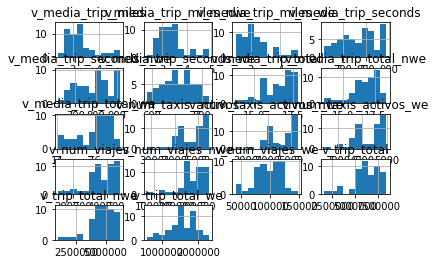

In [29]:
aux.hist()

In [30]:
varc = [x for x in aux.columns if x[:2]=='v_']

In [31]:
X = aux[varc].copy()

In [32]:
X.reset_index(drop=True,inplace=True)

In [33]:
from sklearn.preprocessing import MinMaxScaler

In [34]:
sc = MinMaxScaler()

In [35]:
sc.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [36]:
Xs = pd.DataFrame(sc.transform(X),columns=varc)

In [37]:
X.describe()

,v_media_trip_seconds,v_media_trip_miles,v_media_trip_total,v_trip_total,v_num_viajes,v_num_taxis_activos,v_media_trip_seconds_we,v_media_trip_miles_we,v_media_trip_total_we,v_trip_total_we,v_num_viajes_we,v_num_taxis_activos_we,v_media_trip_seconds_nwe,v_media_trip_miles_nwe,v_media_trip_total_nwe,v_trip_total_nwe,v_num_viajes_nwe,v_num_taxis_activos_nwe
count,53.000000,53.000000,53.000000,5.300000e+01,53.000000,53.000000,53.000000,53.000000,53.000000,5.300000e+01,53.000000,53.000000,53.000000,53.000000,53.000000,5.300000e+01,53.000000,53.000000
mean,768.308301,3.335933,16.544819,6.232847e+06,374777.811321,4704.150943,704.650348,3.179973,15.942901,1.559934e+06,97742.943396,4237.528302,790.465038,3.390392,16.752386,4.672913e+06,277034.867925,4586.301887
std,74.797894,0.553189,0.949615,1.444740e+06,79488.508945,626.491187,62.298936,0.520536,0.873983,3.697132e+05,22529.914279,611.342048,81.277465,0.578400,1.096918,1.095153e+06,58507.965625,633.906739
min,620.561259,2.442197,13.799277,1.657478e+06,111949.000000,2795.000000,578.828773,2.489560,14.023295,5.658820e+05,40335.000000,2449.000000,616.902545,2.369640,13.485469,9.060283e+05,65426.000000,2553.000000
25%,707.355073,2.912487,15.729510,5.551325e+06,331278.000000,4192.000000,664.788441,2.872286,15.313037,1.382312e+06,82871.000000,3745.000000,716.204401,3.061517,16.157520,4.196114e+06,252111.000000,4074.000000
50%,778.647922,3.209542,16.649938,6.303865e+06,381550.000000,5030.000000,702.148850,3.036582,16.152217,1.567389e+06,100121.000000,4550.000000,800.470136,3.305058,16.993344,4.776931e+06,287751.000000,4920.000000
75%,817.803561,3.410762,17.348870,7.380976e+06,435230.000000,5221.000000,751.296992,3.355514,16.586520,1.835157e+06,114588.000000,4767.000000,842.397518,3.502293,17.623352,5.522365e+06,325162.000000,5121.000000
max,887.996626,4.812594,17.784979,8.385200e+06,479324.000000,5467.000000,826.336844,4.576571,17.275316,2.310885e+06,146910.000000,4976.000000,914.006075,4.905473,18.431234,6.241240e+06,355076.000000,5310.000000


In [38]:
Xs.describe()

,v_media_trip_seconds,v_media_trip_miles,v_media_trip_total,v_trip_total,v_num_viajes,v_num_taxis_activos,v_media_trip_seconds_we,v_media_trip_miles_we,v_media_trip_total_we,v_trip_total_we,v_num_viajes_we,v_num_taxis_activos_we,v_media_trip_seconds_nwe,v_media_trip_miles_nwe,v_media_trip_total_nwe,v_trip_total_nwe,v_num_viajes_nwe,v_num_taxis_activos_nwe
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.552459,0.377041,0.688848,0.680077,0.715424,0.714503,0.508353,0.330814,0.590281,0.569656,0.538662,0.707767,0.584182,0.402531,0.660548,0.706042,0.730567,0.737505
std,0.279686,0.233374,0.238255,0.214744,0.216369,0.234465,0.251705,0.249417,0.268751,0.211870,0.211400,0.241924,0.273566,0.228091,0.221789,0.205269,0.201995,0.229926
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.324541,0.198401,0.484289,0.578776,0.597017,0.522829,0.347300,0.183385,0.396597,0.467867,0.399118,0.512861,0.334233,0.272840,0.540271,0.616674,0.644519,0.551687
50%,0.591121,0.323720,0.715222,0.690633,0.733858,0.836452,0.498247,0.262108,0.654646,0.573928,0.560976,0.831421,0.617857,0.368880,0.709268,0.725539,0.767564,0.858542
75%,0.737533,0.408609,0.890582,0.850733,0.879976,0.907934,0.696819,0.414925,0.788194,0.727377,0.696721,0.917293,0.758978,0.446659,0.836652,0.865258,0.896724,0.931447
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2d3e54f278>,
      dtype=object)

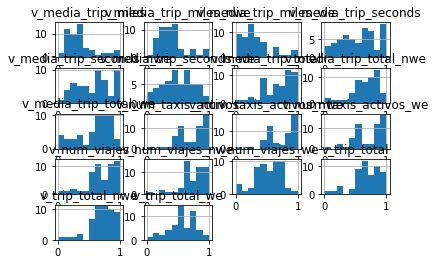

In [39]:
Xs.hist()

In [52]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [53]:
pi = make_pipeline(StandardScaler(),PCA())

In [54]:
pi.fit(X) 

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [56]:
Xp = pd.DataFrame(pi.transform(X),columns=["p_%d"%(i+1) for i in range(len(X.columns))])

In [57]:
Xp.corr()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12,p_13,p_14,p_15,p_16,p_17,p_18
p_1,1.000000e+00,3.538606e-16,1.216000e-16,-6.784966e-16,5.057174e-17,-6.711642e-16,-4.718618e-16,-4.690390e-16,1.012596e-15,6.351013e-16,2.134484e-15,3.149530e-16,-9.203236e-15,1.615330e-15,4.451543e-14,-6.631565e-14,-0.004585,-0.288397
p_2,3.538606e-16,1.000000e+00,-3.936958e-17,-2.510537e-16,-7.367965e-17,-2.961640e-16,3.555423e-16,1.053179e-15,2.203464e-16,2.628521e-15,-1.944332e-15,2.594775e-16,-3.395883e-15,2.190803e-15,1.104235e-14,-1.681997e-14,-0.007232,0.026907
p_3,1.216000e-16,-3.936958e-17,1.000000e+00,-4.234502e-16,5.345154e-16,-5.432237e-16,-2.803177e-17,1.959341e-16,-2.742839e-15,4.880739e-15,3.414801e-15,-3.525045e-15,3.455261e-16,1.253131e-15,-3.843772e-14,9.239493e-14,-0.013895,0.838370
p_4,-6.784966e-16,-2.510537e-16,-4.234502e-16,1.000000e+00,5.794487e-16,-1.997306e-16,-1.129628e-16,7.218425e-16,-1.471166e-15,-2.460095e-16,-6.058381e-15,-5.483834e-15,-1.254761e-14,4.893365e-15,-3.943172e-14,3.694766e-14,0.000797,-0.190882
p_5,5.057174e-17,-7.367965e-17,5.345154e-16,5.794487e-16,1.000000e+00,-4.725592e-16,-4.284322e-16,-9.685294e-16,-1.796376e-16,4.538239e-16,1.387426e-15,2.039568e-15,1.449936e-15,-8.541933e-17,1.441126e-14,-5.056090e-14,-0.000623,0.319832
p_6,-6.711642e-16,-2.961640e-16,-5.432237e-16,-1.997306e-16,-4.725592e-16,1.000000e+00,-1.523195e-17,4.055810e-16,-1.071626e-15,-2.613554e-16,-4.507353e-15,-3.899602e-15,-2.690237e-15,-8.450157e-16,-2.404259e-14,6.359777e-14,-0.000542,0.118491
p_7,-4.718618e-16,3.555423e-16,-2.803177e-17,-1.129628e-16,-4.284322e-16,-1.523195e-17,1.000000e+00,-7.597723e-16,-4.737468e-17,5.805767e-16,-1.817019e-15,-2.110063e-15,1.417110e-15,-2.448655e-15,-1.330628e-14,2.895804e-14,-0.003821,-0.030394
p_8,-4.690390e-16,1.053179e-15,1.959341e-16,7.218425e-16,-9.685294e-16,4.055810e-16,-7.597723e-16,1.000000e+00,-9.255197e-17,3.928099e-16,1.629000e-15,-1.908937e-16,1.362704e-15,-1.204924e-15,2.769542e-15,-3.872861e-15,0.001492,-0.058458
p_9,1.012596e-15,2.203464e-16,-2.742839e-15,-1.471166e-15,-1.796376e-16,-1.071626e-15,-4.737468e-17,-9.255197e-17,1.000000e+00,-1.816770e-16,-1.465992e-15,-1.118974e-15,-1.635921e-15,-1.861817e-15,-1.444578e-15,1.451008e-14,-0.001736,-0.137427
p_10,6.351013e-16,2.628521e-15,4.880739e-15,-2.460095e-16,4.538239e-16,-2.613554e-16,5.805767e-16,3.928099e-16,-1.816770e-16,1.000000e+00,7.975533e-16,-5.459985e-16,3.640971e-15,-3.765131e-16,7.040461e-15,-1.052245e-14,0.003226,0.052495


In [58]:
Xp.describe()

,p_1,p_2,p_3,p_4,p_5,p_6,p_7,p_8,p_9,p_10,p_11,p_12,p_13,p_14,p_15,p_16,p_17,p_18
count,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01,5.300000e+01
mean,-6.703233e-17,7.960090e-17,3.770569e-17,2.932665e-17,-8.379042e-18,-1.780546e-17,-3.770569e-17,-2.094760e-17,-4.975056e-18,1.361594e-17,-2.618451e-17,3.273063e-17,3.665831e-18,1.492517e-17,8.788175e-18,1.524020e-17,2.614756e-17,2.168730e-18
std,3.190651e+00,2.299477e+00,1.320703e+00,7.100884e-01,5.292729e-01,4.177465e-01,3.460211e-01,1.879617e-01,1.119285e-01,6.111004e-02,4.106822e-02,3.399397e-02,2.353948e-02,2.066090e-02,5.422797e-03,2.882565e-03,2.063266e-14,4.621408e-16
min,-5.189957e+00,-4.113691e+00,-2.498746e+00,-1.775127e+00,-1.295968e+00,-1.067202e+00,-7.204059e-01,-4.010650e-01,-2.414377e-01,-1.119935e-01,-1.047921e-01,-7.453540e-02,-6.599973e-02,-5.275699e-02,-1.000005e-02,-5.615473e-03,-3.655187e-14,-1.088292e-15
25%,-2.366887e+00,-1.894642e+00,-7.918914e-01,-3.748803e-01,-2.898200e-01,-2.387787e-01,-2.358088e-01,-1.413302e-01,-7.752695e-02,-3.294952e-02,-3.142490e-02,-1.974664e-02,-9.082345e-03,-1.163490e-02,-3.568770e-03,-2.002925e-03,-1.179863e-14,-3.198741e-16
50%,2.430116e-01,3.425934e-01,-3.115682e-01,2.722002e-03,4.548253e-02,-3.425200e-02,-1.054989e-02,-1.471010e-02,-2.153740e-02,-1.074748e-02,-2.478481e-03,-4.094867e-03,2.713075e-04,-3.231262e-03,-4.317926e-04,-7.167802e-05,-1.029605e-15,-3.095042e-17
75%,1.269676e+00,1.399268e+00,5.400189e-01,3.975566e-01,3.494608e-01,2.190120e-01,1.544594e-01,8.825493e-02,5.978131e-02,2.416104e-02,2.120846e-02,1.657767e-02,1.400133e-02,1.148595e-02,1.814487e-03,1.652087e-03,1.058525e-14,1.637270e-16
max,8.223649e+00,4.213731e+00,3.610331e+00,2.236332e+00,1.478821e+00,1.604126e+00,1.358642e+00,4.048216e-01,2.796711e-01,2.307827e-01,1.215794e-01,7.642588e-02,7.090381e-02,5.467436e-02,1.734590e-02,9.523069e-03,4.632861e-14,1.335815e-15


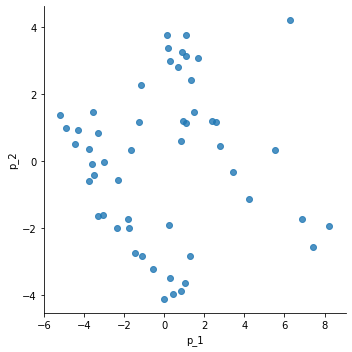

In [59]:
sns.lmplot(data=Xp,x='p_1',y='p_2',fit_reg=False)

In [65]:
pi.steps[1][1].explained_variance_ratio_.cumsum()

array([0.55489855, 0.84311115, 0.9381859 , 0.96566989, 0.98093902,
       0.99045122, 0.99697741, 0.99890313, 0.999586  , 0.99978955,
       0.99988149, 0.99994447, 0.99997468, 0.99999794, 0.99999955,
       1.        , 1.        , 1.        ])

In [66]:
from sklearn.cluster import KMeans

In [67]:
lst_in = []
for k in range(2,20):
    print(k)
    cl = KMeans(n_clusters=k)
    cl.fit(Xs)
    lst_in.append(cl.inertia_)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


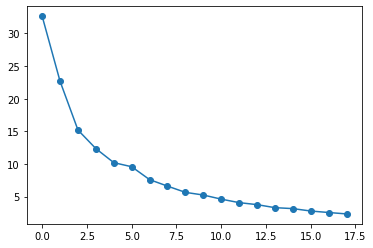

In [75]:
plt.plot(lst_in,marker='o')

In [96]:
cl = KMeans(n_clusters=4)

In [97]:
cl.fit(Xs)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [98]:
aux['cl']= Xs['cl'] = X['cl'] = Xp['cl'] = cl.predict(Xs)

In [99]:
aux.head()

,v_media_trip_seconds,v_media_trip_miles,v_media_trip_total,v_trip_total,v_num_viajes,v_num_taxis_activos,v_media_trip_seconds_we,v_media_trip_miles_we,v_media_trip_total_we,v_trip_total_we,v_num_viajes_we,v_num_taxis_activos_we,v_media_trip_seconds_nwe,v_media_trip_miles_nwe,v_media_trip_total_nwe,v_trip_total_nwe,v_num_viajes_nwe,v_num_taxis_activos_nwe,cl
week,,,,,,,,,,,,,,,,,,,
00,620.561259,2.838366,14.806048,1657477.90,111949,4481,625.706914,3.025303,16.152217,751449.57,46523,3899,616.902545,2.705432,13.848774,906028.33,65426,4056,3
01,651.686316,2.899970,15.625431,5551325.06,355281,4925,630.667095,3.025437,16.029348,1447674.51,90316,4512,658.850657,2.857202,15.487753,4103650.55,264965,4808,1
02,675.343445,2.885612,15.660823,6399638.75,408644,5030,583.372123,2.653539,14.683792,1471536.22,100219,4565,705.226228,2.961021,15.978285,4928102.53,308425,4920,1
03,651.726287,2.867323,15.659870,6303865.11,402544,5033,578.828773,2.489560,14.288059,1491101.87,104356,4566,677.237849,2.999531,16.139976,4812763.24,298188,4922,1
04,644.400997,2.830224,15.656480,6050274.58,386441,5038,584.526590,2.570498,14.683625,1372316.93,93459,4589,663.499904,2.913074,15.966816,4677957.65,292982,4930,1


In [100]:
aux.cl.value_counts(normalize=True)

1    0.396226
0    0.339623
2    0.150943
3    0.113208
Name: cl, dtype: float64

In [102]:
from sklearn.feature_selection import SelectKBest

In [103]:
sk = SelectKBest(k=4)

In [104]:
sk.fit(Xs[varc],Xs['cl'])

SelectKBest(k=4, score_func=<function f_classif at 0x7f2d1a3c89d8>)

In [105]:
var_best = [a for a,b in zip(varc,sk.get_support()) if b]

In [106]:
Xs[var_best+['cl']].groupby('cl').mean()

,v_num_taxis_activos,v_num_taxis_activos_we,v_media_trip_miles_nwe,v_num_taxis_activos_nwe
cl,,,,
0,0.511560,0.505144,0.346593,0.544211
1,0.880756,0.883864,0.356831,0.901066
2,0.961499,0.952216,0.852220,0.976605
3,0.412113,0.373368,0.130712,0.426127


In [107]:
aux[var_best+['cl']].groupby('cl').mean()

,v_num_taxis_activos,v_num_taxis_activos_we,v_media_trip_miles_nwe,v_num_taxis_activos_nwe
cl,,,,
0,4161.888889,3725.50000,3.248542,4053.388889
1,5148.380952,4682.52381,3.274505,5037.238095
2,5364.125000,4855.25000,4.530727,5245.500000
3,3896.166667,3392.50000,2.701103,3727.833333


In [108]:
pd.DataFrame(aux[var_best].mean()).T

,v_num_taxis_activos,v_num_taxis_activos_we,v_media_trip_miles_nwe,v_num_taxis_activos_nwe
0,4704.150943,4237.528302,3.390392,4586.301887


In [110]:
sorted(list(aux.loc[aux.cl==3].index))

['00', '47', '49', '50', '51', '52']

In [116]:
sorted(set(df.loc[df.week.isin(sorted(list(aux.loc[aux.cl==0].index)))].trip_start_timestamp))

[datetime.date(2016, 7, 24),
 datetime.date(2016, 7, 25),
 datetime.date(2016, 7, 26),
 datetime.date(2016, 7, 27),
 datetime.date(2016, 7, 28),
 datetime.date(2016, 7, 29),
 datetime.date(2016, 7, 30),
 datetime.date(2016, 7, 31),
 datetime.date(2016, 8, 1),
 datetime.date(2016, 8, 2),
 datetime.date(2016, 8, 3),
 datetime.date(2016, 8, 4),
 datetime.date(2016, 8, 5),
 datetime.date(2016, 8, 6),
 datetime.date(2016, 8, 7),
 datetime.date(2016, 8, 8),
 datetime.date(2016, 8, 9),
 datetime.date(2016, 8, 10),
 datetime.date(2016, 8, 11),
 datetime.date(2016, 8, 12),
 datetime.date(2016, 8, 13),
 datetime.date(2016, 8, 14),
 datetime.date(2016, 8, 15),
 datetime.date(2016, 8, 16),
 datetime.date(2016, 8, 17),
 datetime.date(2016, 8, 18),
 datetime.date(2016, 8, 19),
 datetime.date(2016, 8, 20),
 datetime.date(2016, 8, 21),
 datetime.date(2016, 8, 22),
 datetime.date(2016, 8, 23),
 datetime.date(2016, 8, 24),
 datetime.date(2016, 8, 25),
 datetime.date(2016, 8, 26),
 datetime.date(2016, 8,

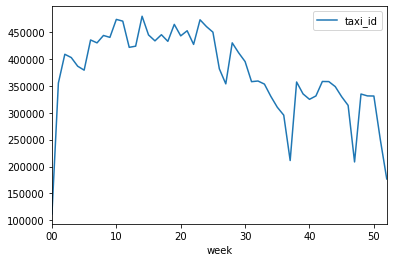

In [118]:
df[['week','taxi_id']].groupby('week').count().plot()

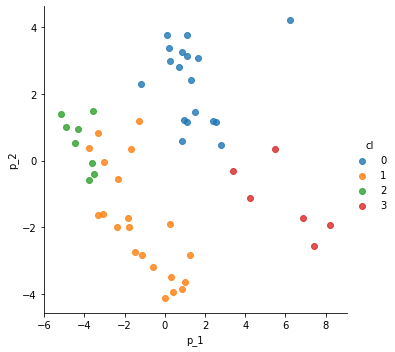

In [120]:
sns.lmplot(data=Xp,x='p_1',y='p_2',hue='cl',fit_reg=False)